# Análisis de Datos

Un poco de análisis de datos antes de intentar definir modelos.

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Lectura de Datos

In [2]:
train_df = pd.read_csv('DataSet/travel_insurance_prediction_train.csv')
test_df = pd.read_csv('DataSet/travel_insurance_prediction_test.csv')

## Exploración de Datos

In [3]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [4]:
test_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


`TravelInsurance` es la columna que deberíamos predecir, la cual no está presente en el conjunto de datos de evaluación.

In [5]:
train_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


No hay valores **nulos** en el conjunto de datos de entrenamiento.

In [7]:
test_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.970000e+02,497.00000,497.000000
mean,1739.000000,29.599598,9.475855e+05,4.68008,0.283702
std,143.615807,3.010506,3.635818e+05,1.51347,0.451248
min,1491.000000,25.000000,3.000000e+05,2.00000,0.000000
25%,1615.000000,28.000000,6.500000e+05,4.00000,0.000000
50%,1739.000000,29.000000,9.500000e+05,4.00000,0.000000
75%,1863.000000,32.000000,1.250000e+06,6.00000,1.000000
max,1987.000000,35.000000,1.750000e+06,9.00000,1.000000


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


No hay valores **nulos** en el conjunto de datos de evaluación.

## Frecuencia en variables categóricas

A simple vista, parece que ambos conjuntos de datos provienen de la misma distribución.
A partir de ahora vamos a concentrarnos exclusivamente en el conjunto de **entrenamiento**.

In [9]:
categoric_cols = ['Employment Type',
                  'GraduateOrNot',
                  'FrequentFlyer',
                  'EverTravelledAbroad',
                 ]

train_df[categoric_cols].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1490,1490,1490,1490
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1057,1268,1173,1202


In [10]:
import math

def multiple_countplots(n_cols, n_rows, features, df=train_df, split=None):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 10))

    for i, feature in enumerate(features):
        # Calculamos filas y columnas
        row = math.floor(i / n_cols)
        col = i % n_cols
        # Configuramos visualización
        ax = axs[row, col]
        # Visualizamos la distribución de variables
        sn.countplot(x=feature, data=df, ax=ax, hue=split)

    # Limpiamos gráficos vacíos
    for col in range(n_cols):
        for row in range(n_rows):
            if not axs[row, col].has_data():
                axs[row, col].axis('off')

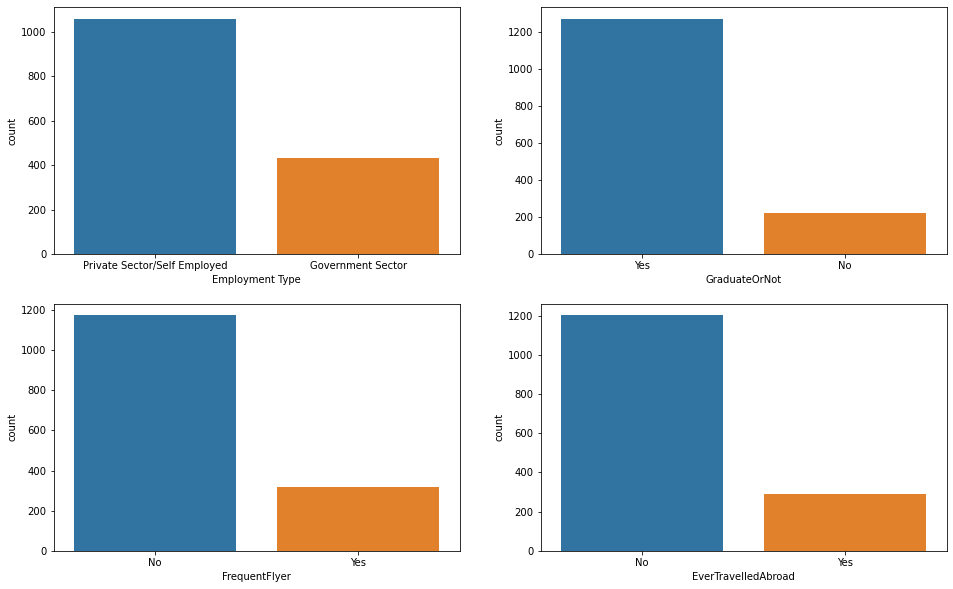

In [11]:
multiple_countplots(n_cols=2,
                    n_rows=2,
                    features=categoric_cols,
                    df=train_df,
                   )

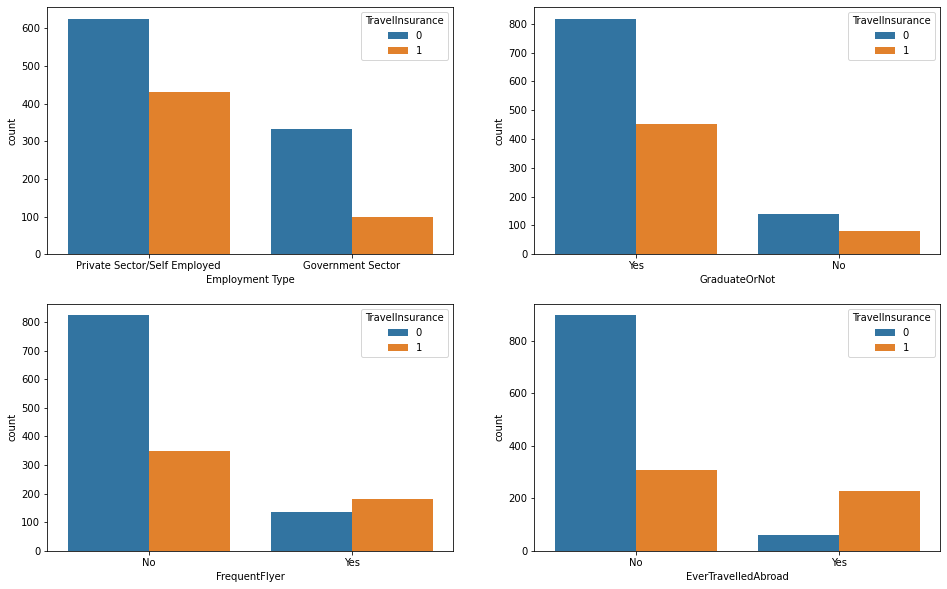

In [12]:
multiple_countplots(n_cols=2,
                    n_rows=2,
                    features=categoric_cols,
                    df=train_df,
                    split='TravelInsurance',
                   )

La mayor parte de los registros corresponde a personas que trabajan en el *sector privado*, y se han *graduado*. Además los ejemplos más comunes son viajeros infrecuentes, que tampoco han viajado al exterior.

## Distribución en variables numéricas

In [13]:
numeric_cols = ['Age',
                'AnnualIncome',
                'FamilyMembers',
                'ChronicDiseases',
                'TravelInsurance',
               ]

train_df[numeric_cols].describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


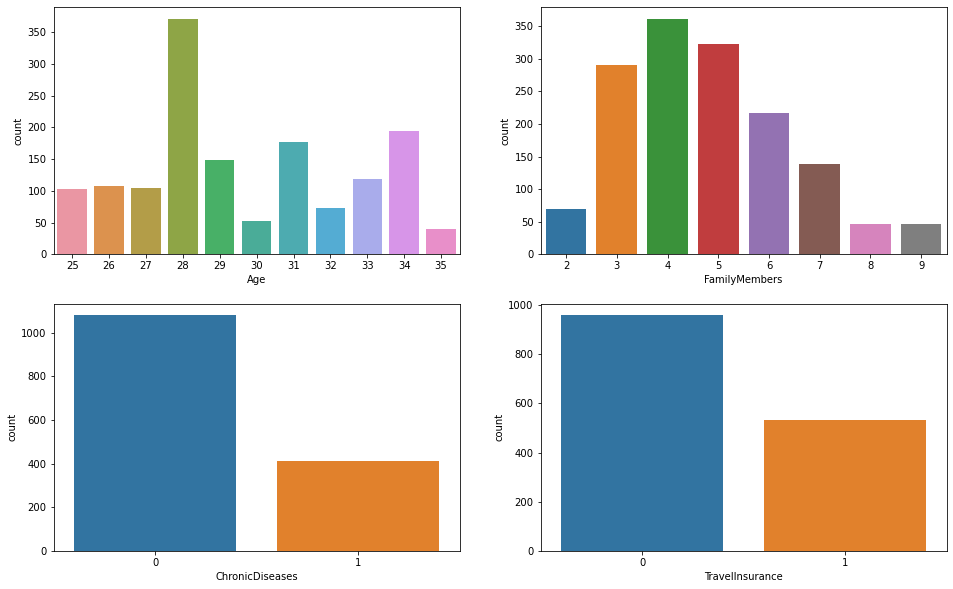

In [14]:
multiple_countplots(n_cols=2,
                    n_rows=2,
                    df=train_df,
                    features=['Age',
                              'FamilyMembers',
                              'ChronicDiseases',
                              'TravelInsurance',
                             ],
                   )

In [15]:
import math

def multiple_boxplots(n_cols, n_rows, special, features, df=train_df, split=None):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 10))

    for i, feature in enumerate(features):
        # Calculamos filas y columnas
        row = math.floor(i / n_cols)
        col = i % n_cols
        # Configuramos visualización
        ax = axs[row, col]
        # Visualizamos la distribución de variables
        sn.boxplot(x=special, y=feature, data=df, hue=split, ax=ax)
        ax.legend(frameon=True, loc='best')

    # Limpiamos gráficos vacíos
    for col in range(n_cols):
        for row in range(n_rows):
            if not axs[row, col].has_data():
                axs[row, col].axis('off')

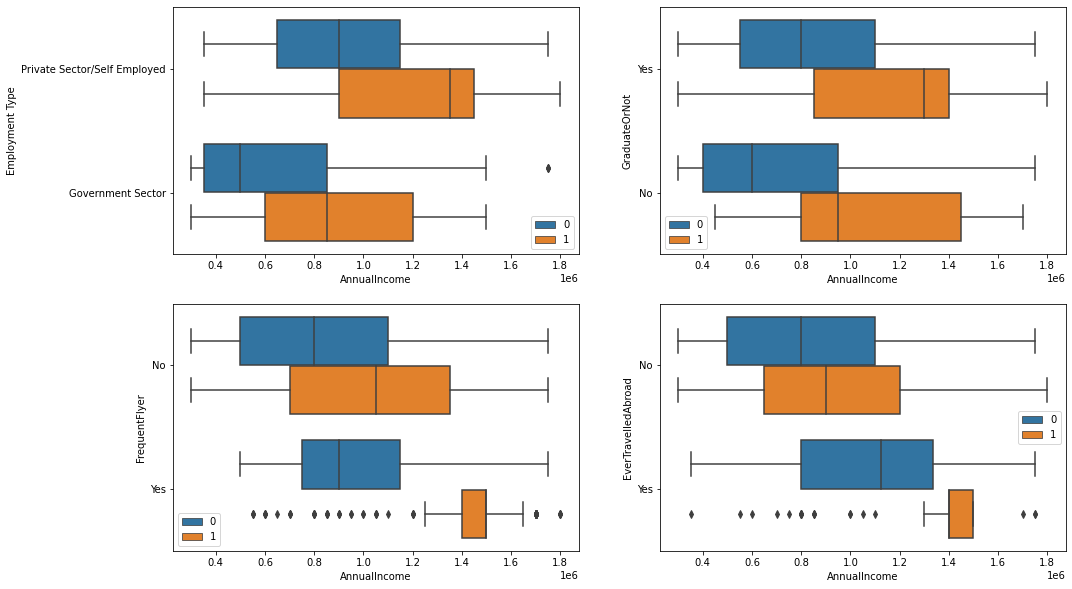

In [16]:
multiple_boxplots(n_cols=2,
                  n_rows=2,
                  special='AnnualIncome',
                  features=categoric_cols,
                  df=train_df,
                  split='TravelInsurance',
                 )

En general, para todos los atributos, aquellos registros con mayor **ingreso anual** suelen contratar el seguro de viaje.

## Correlación en variables numéricas

In [17]:
correlation = train_df[numeric_cols].corr()

correlation

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.016513,0.004190,0.008247,0.068138
AnnualIncome,-0.016513,1.000000,-0.018384,0.003612,0.395549
FamilyMembers,0.004190,-0.018384,1.000000,0.019762,0.081617
ChronicDiseases,0.008247,0.003612,0.019762,1.000000,0.019600
TravelInsurance,0.068138,0.395549,0.081617,0.019600,1.000000


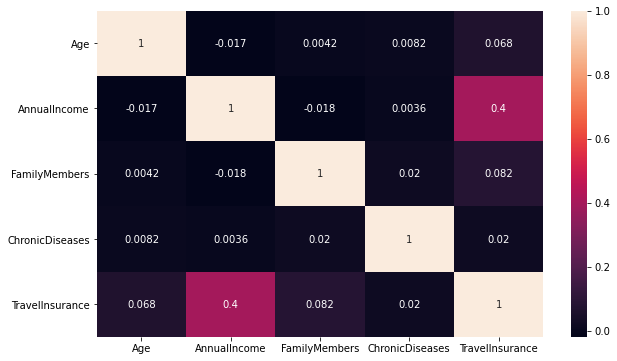

In [18]:
plt.figure(figsize=(10, 6))

sn.heatmap(correlation, annot=True);

Se observa que la mayor correlación existe entre las variables `AnnualIncome` y `TravelInsurance`.

## Otros gráficos

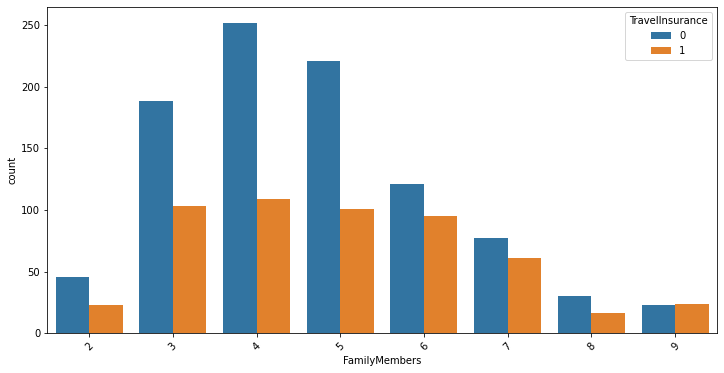

In [19]:
fig = plt.figure(figsize=(12, 6))

sn.countplot(data=train_df, x='FamilyMembers', hue='TravelInsurance')
plt.xticks(rotation=45);

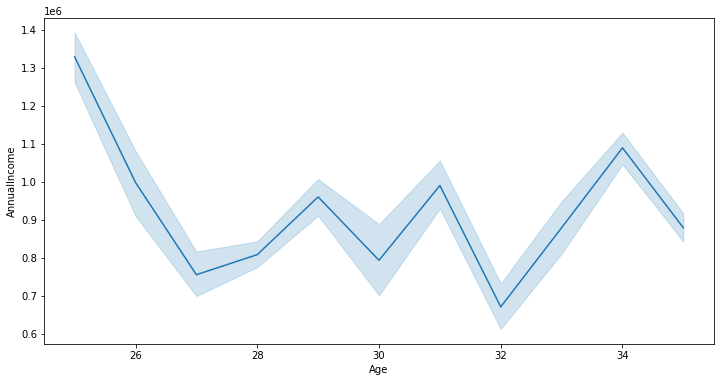

In [20]:
plt.figure(figsize=(12, 6))

sn.lineplot(data=train_df, x='Age', y='AnnualIncome', estimator=np.mean);

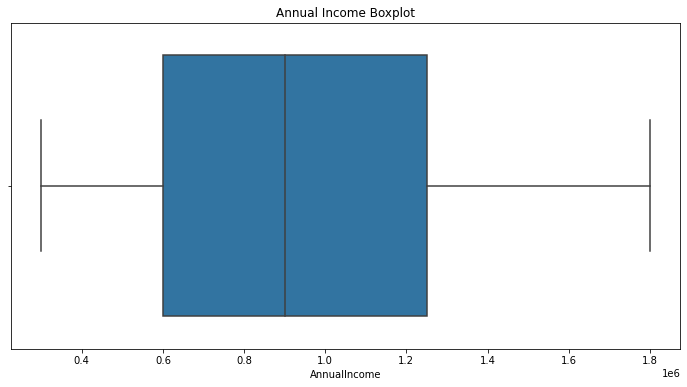

In [21]:
plt.figure(figsize=(12, 6))

sn.boxplot(x=train_df['AnnualIncome']).set(title='Annual Income Boxplot');

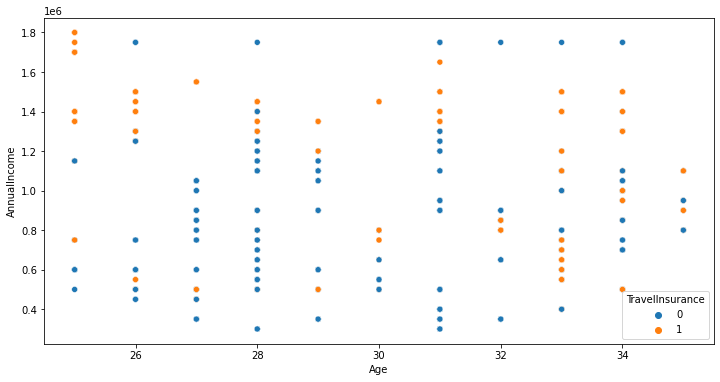

In [22]:
plt.figure(figsize=(12, 6))

sn.scatterplot(data=train_df, x='Age', y='AnnualIncome', hue='TravelInsurance');

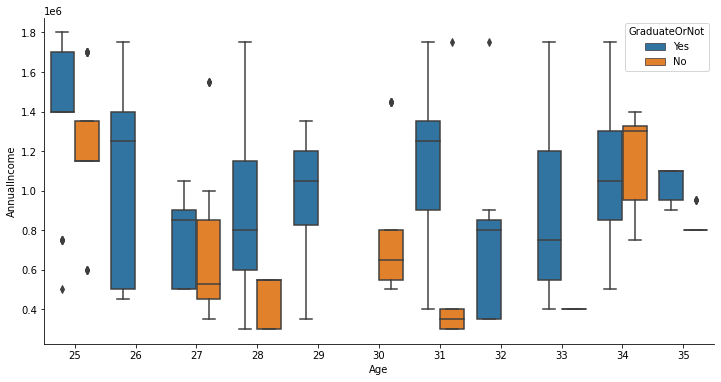

In [23]:
plt.figure(figsize=(12, 6))

sn.boxplot(data=train_df, x='Age', y='AnnualIncome', hue='GraduateOrNot')
sn.despine();